# Offline Reinforcement Learning with Replay
> Replay evaluation essentially takes historic events and algorithm’s recommendations at each time step and throws out all samples except for those where your model’s recommendation is the same as the one the user saw in the historic dataset.

- toc: true
- badges: false
- comments: true
- categories: [RL, Replay, OfflineRL, OfflineLearning]
- image:

## Introduction

Duration: 5

### What you'll learn?

- Offline RL concepts
- Replay method of evaluation
- RecoGym toolkit
- Apply Replay method on real-world datasets

### Why is this important?

We couldn't just blindly apply RL algorithms in a production system out of the box. The learning period would be too costly. Instead, we need to leverage the vast amounts of offline training examples to make the algorithm perform as well as the current system before releasing it into the online production environment.

Both bandit algorithms and A/B tests are online algorithms, which means that they do not have a full set of data upfront to be trained on. Instead, they learn incrementally as the data is accrued. Their performance can be evaluated offline, however, through backtesting using a technique known as the “replay” method. This works by predicting which option the algorithm would select for a viewer, and if there is a historical record of the viewer’s interaction with that option, the result — whether the experience was positive or negative — is counted as if it had happened. If there is no historical record of that interaction, it is ignored.

> **Bandits provide the most benefit when there is a cost associated with making a suboptimal suggestion.**

Bandit’s recommendations will be different from those generated by the model whose recommendations are reflected in your historic dataset. This creates problems that lead to some of the key challenges in evaluating these algorithms using historic data.

1. this is problematic is that your data is probably biased
2. algorithm will often produce recommendations that are different from the recommendations seen by users in the historic dataset

The solution to the above problem is called **replay**. Replay evaluation essentially takes historic events and algorithm’s recommendations at each time step and throws out all samples except for those where your model’s recommendation is the same as the one the user saw in the historic dataset.



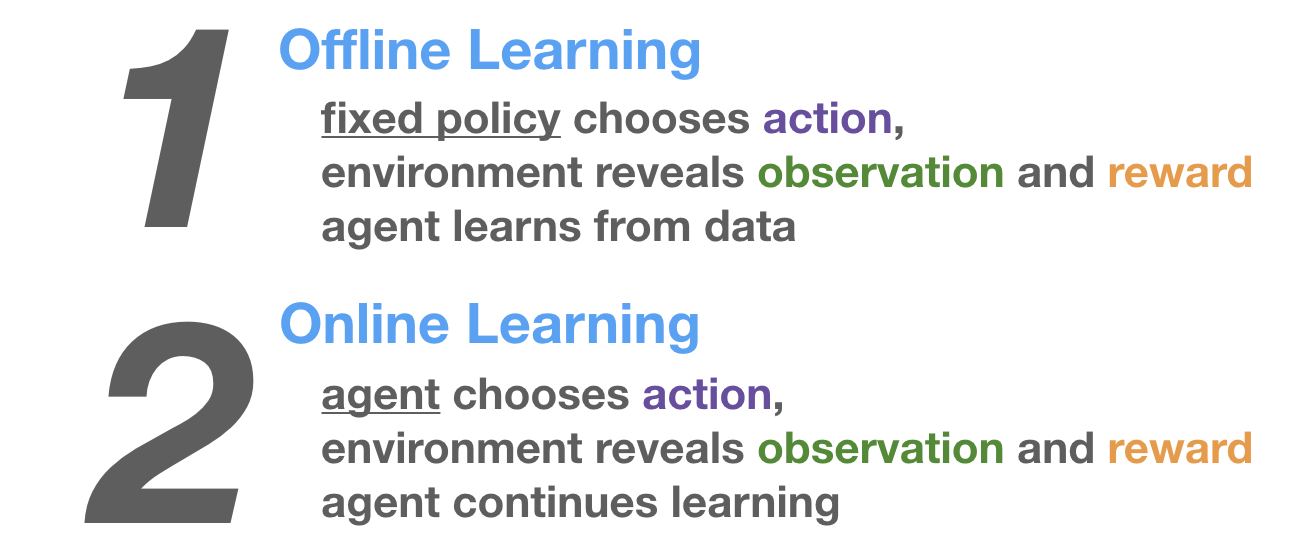

### How it will work?

- Apply replay method on MovieLens and Amazon Electronics dataset
- Generate data, simulate and compare the offline agent performance with online results in RecoGym

### Who is this for?

- People who are new to reinforcement learning concepts
- People looking to use reinforcement learning in recommender systems
- People who want to learn the offline methods of training an RL agent

### Important resources

- [Notebook - Offline Replayer Evaluation I - Recogym](https://nb.recohut.com/bandit/2021/06/17/recostep-tutorial-offline-replayer-eval-recogym.html)
- [Notebook - Offline Replayer Evaluation II - Recogym small](https://nb.recohut.com/bandit/2021/06/17/recostep-tutorial-offline-replayer-eval-recogym-small.html)
- [Notebook - Offline Replayer Evaluation III - Amazon electronics dataset](https://nb.recohut.com/amazon/bandit/2021/06/17/recostep-tutorial-offline-replayer-eval-amazon-electronics.html)
- [Notebook - Offline Replayer Evaluation IV - Movielens Expt 1](https://nb.recohut.com/bandit/movie/2021/06/17/recostep-tutorial-offline-replayer-eval-movielens-2.html)
- [Notebook - Offline Replayer Evaluation V - Movielens Expt 2 (draft version only)](https://colab.research.google.com/gist/sparsh-ai/7a4c369d6cafabcda13b842c65b97801/2021-06-17-recostep-tutorial-offline-replayer-eval-movielens.ipynb)

<!---------------------------->

## Industry Examples

Duration: 10

### How Netflix use contextual bandits to personalize images for shows

[Read here on Netflix's blog](https://netflixtechblog.com/artwork-personalization-c589f074ad76)

The bandit can choose from a set of images for each show (i.e., action) and observe the number of minutes the user played the show after being impressed with the image (i.e., reward). It also has information about user attributes (e.g., titles played, genres played, country, language preferences), day of the week, time of day, etc. (i.e., context).

For offline evaluation of the bandit, they apply replay on the bandit’s predicted image and the random image shown during the exploration phase. They first get the bandit’s predicted image for each user-show pair. Then, they try to match it with the random images shown to users in the exploration phase. If the predicted image matches the randomly assigned image, that predicted-random match can be used for evaluation.



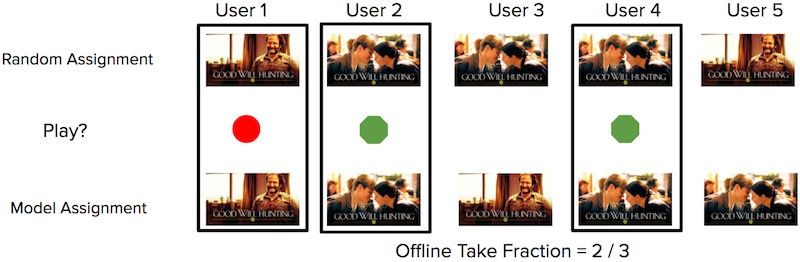

From the set of predicted-random matches, they check if the user played the title or not. The main metric of interest is the number of quality plays over the number of impressions (i.e., take fraction)—for the n images that were recommended, how many resulted in the user watching the show?

The benefit of replay is that it’s an unbiased metric when accounting for the probability of each image shown during exploration. Having the probability allows us to weigh the reward to control for bias in image display rates, either in exploration or production. (Also see this [SIGIR tutorial on counterfactual evaluation](http://www.cs.cornell.edu/~adith/CfactSIGIR2016/)) The downside is that it requires a lot of data, and there could be high variance in evaluation metrics if there are few matches between the predicted and random data. Nonetheless, techniques such as [doubly robust estimation](https://arxiv.org/abs/1103.4601) can help.

### How Doordash use contextual bandit for cusine recommendations?

[Read here on Doordash's blog](https://doordash.engineering/2020/01/27/personalized-cuisine-filter/)

**Doordash also adopted a contextual bandit approach for [cuisine recommendations](https://doordash.engineering/2020/01/27/personalized-cuisine-filter/), with the addition of multiple geolocation levels.** The bandit explores by suggesting new cuisine types to customers to gauge their interest, and exploits to recommend customers their most preferred cuisines.

To model the “average” cuisine preference in each location, they introduced multiple levels in their bandit. As an example, they shared how levels could go from the lowest level of district, through submarket, market, and region.



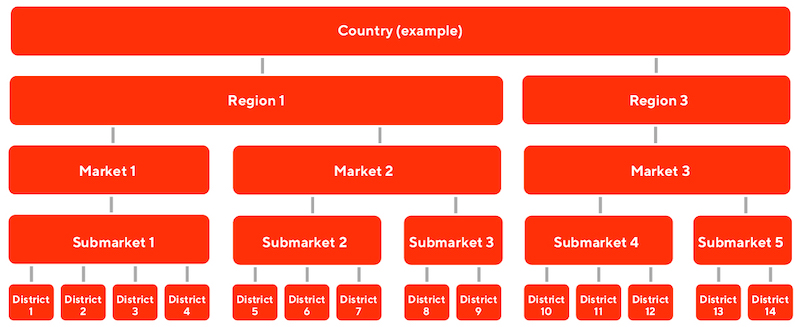

Each geolocation level provides prior knowledge so that cold-start customers can be represented by the prior of the location, until the bandit collects enough data about them for personalization. The geolocation priors also allows Doordash to balance the customer’s existing preferences with the hot favorites of each geolocation. A sushi-lover ordering food from a new geolocation may be exposed to the hot favorite in the area (e.g., fried chicken), balancing his preferences with local popularity.

### How Spotify uses contextual bandits to identify the best recommendation explanations?

[Read more in this paper](https://dl.acm.org/doi/10.1145/3240323.3240354)

Spotify using contextual bandits to identify the best recommendation explanation (aka “recsplanations”) for users. The problem was how to jointly personalize music recommendations with their associated explanation, where the reward is user engagement on the recommendation. Contextual features include user region, product, and platform of the user device, user listening history (genres, playlist), etc.

An initial approach involved using logistic regression to predict user engagement from a recsplanation, given data about the recommendation, explanation, and user context. However, for logistic regression, the recsplanation that maximized reward was the same regardless of the user context.

To address this, they introduced higher-order interactions between recommendation, explanation, and user context, first by embedding them, and then introducing inner products on the embeddings (i.e., 2nd-order interactions). Then, the 2nd-order interactions are combined with first-order variables via a weighted sum, making it a 2nd-order factorization machine. They tried both 2nd and 3rd order factorization machines. (For more details of factorization machines in recommendations, see figure 2 and the “FM Component” section in the [DeepFM](https://arxiv.org/abs/1703.04247) paper).

To train their model, they adopt sample reweighting to account for the non-uniform probability of recommendations in production. (They didn’t have the benefit of uniform random samples like in the Netflix example.) During the offline evaluation, the 3rd-order factorization machine performed best. During online evaluation (i.e., A/B test), both 2nd and 3rd-order factorization machines did better than logistic regression and the baseline. Nonetheless, there was no significant difference between the 2nd and 3rd-order models.

### Stitch Fix multi-armed bandit experiment

[Read more on official blog](https://multithreaded.stitchfix.com/blog/2020/08/05/bandits/)

<!---------------------------->

## Amazon Electronics with Replay

Duration: 5

Data: [kaggle](https://www.kaggle.com/saurav9786/amazon-product-reviews), [site](http://jmcauley.ucsd.edu/data/amazon/)

### Reading the data

```python
logger.info("Multi-Armed-Bandits-for-Recommendations-and-A-B-testing !!!")
logger.info("Current time: " + str(current_time))

logger.info("Reading the data..!!")

start = time.time()
header_list = ["User_ID", "Product_ID", "Rating", "Time_Stamp"]
rating_df = pd.read_csv('ratings_Electronics (1).csv', names=header_list)
latency["Data_reading -"] = time.time() - start
logger.info("Read the data Successfully ..!!!")

reward_threshold = 4
rating_df['reward'] = rating_df.eval('Rating > @reward_threshold').astype(int)
```

We downloaded the dataset from Kaggle. After extraction, we loaded it into Pandas dataframe and created a column 'reward' which is one if rating is max (5 in this case) otherwise reward is zero.

### Running the simulation

We simulated like this:

```python
logger.info("Thompson Sampling Simulations...starts...!!!")

start = time.time()

thompson_results = ThompsonSamplingReplayer(n_visits, reward_history,
                                            item_col_name, visitor_col_name, reward_col_name,
                                            n_iterations=n_iterations).simulator()

thompson_results_df = pd.DataFrame(thompson_results)
latency["Thompson Sampling Simulations  -"] = time.time() - start
logger.info("Thompson Sampling Simulations completed Successfully..!!")

thompson_results_df.to_csv(target_dir +'/thompson_results_df.csv')

logger.info("Thompson Sampling Simulations results saved Successfully..!!")
```

### Results

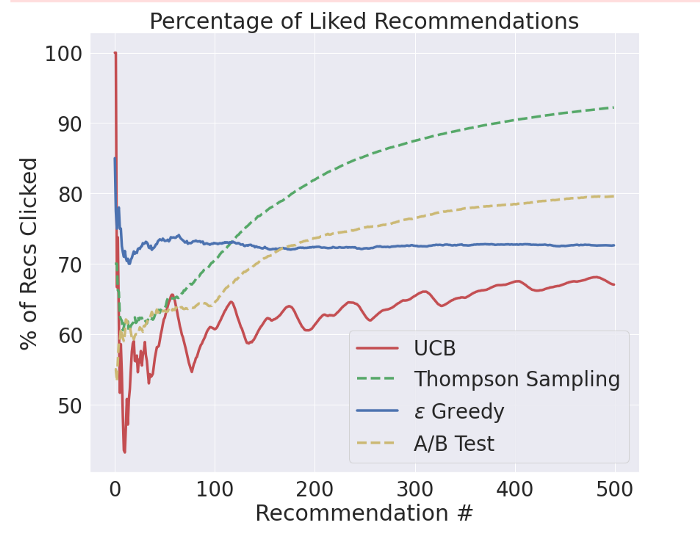

From above it clear that Multi-arm bandit is way better compared to A/B testing. Among the Multi-arm bandit, Thompson sampling works the best. The Thompson Sampling results (brown) are the best of them all. This bandit performs better than the ε-Greedy bandit because it dynamically adjusts the rate at which it explores — rather than using a constant rate. In the beginning, it explores more often, but over time, it explores less often. As a result, this bandit quickly identifies the best product and exploits it more frequently after it has been found, leading to high performance in both the short- and long-term.

<!---------------------------->

## MovieLens with Replay (Expt 1)

Duration: 5

At each time step, a random user receives a slate of 5 movie recommendations. She picks one movie and then gives a rating on a 5-star scale with half-star increments (0.5 to 5.0 stars). The objective is to maximize the cumulative sum of all ratings.

We are comparing 3 algorithms - Epsilon greedy, Upper confidence bound, and Thompson sampling. Since each user is served a slate of 5 movies, and not just one, a recommendation consists of the top 5 movies with the highest scores that an algorithm uses to order these movies and choose the best action. However, feedback is only available for the movie which has been picked by the user.

### Results



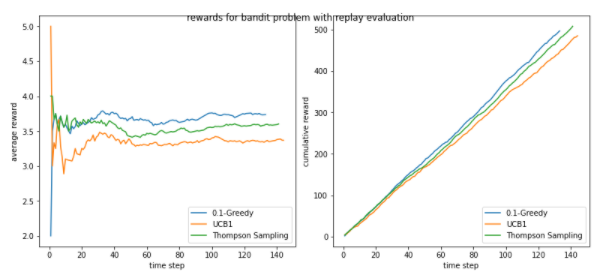

Epsilon greedy with exploration rate of 10% is the best performer, and thompson sampling is a close competitor. With large datasets, it is possible that thompson sampling performs better. And Interestingly, after just 15 steps, both of these algorithms started performing at optimal level.

<!---------------------------->

## MovieLens with Replay (Expt 2)

Duration: 10

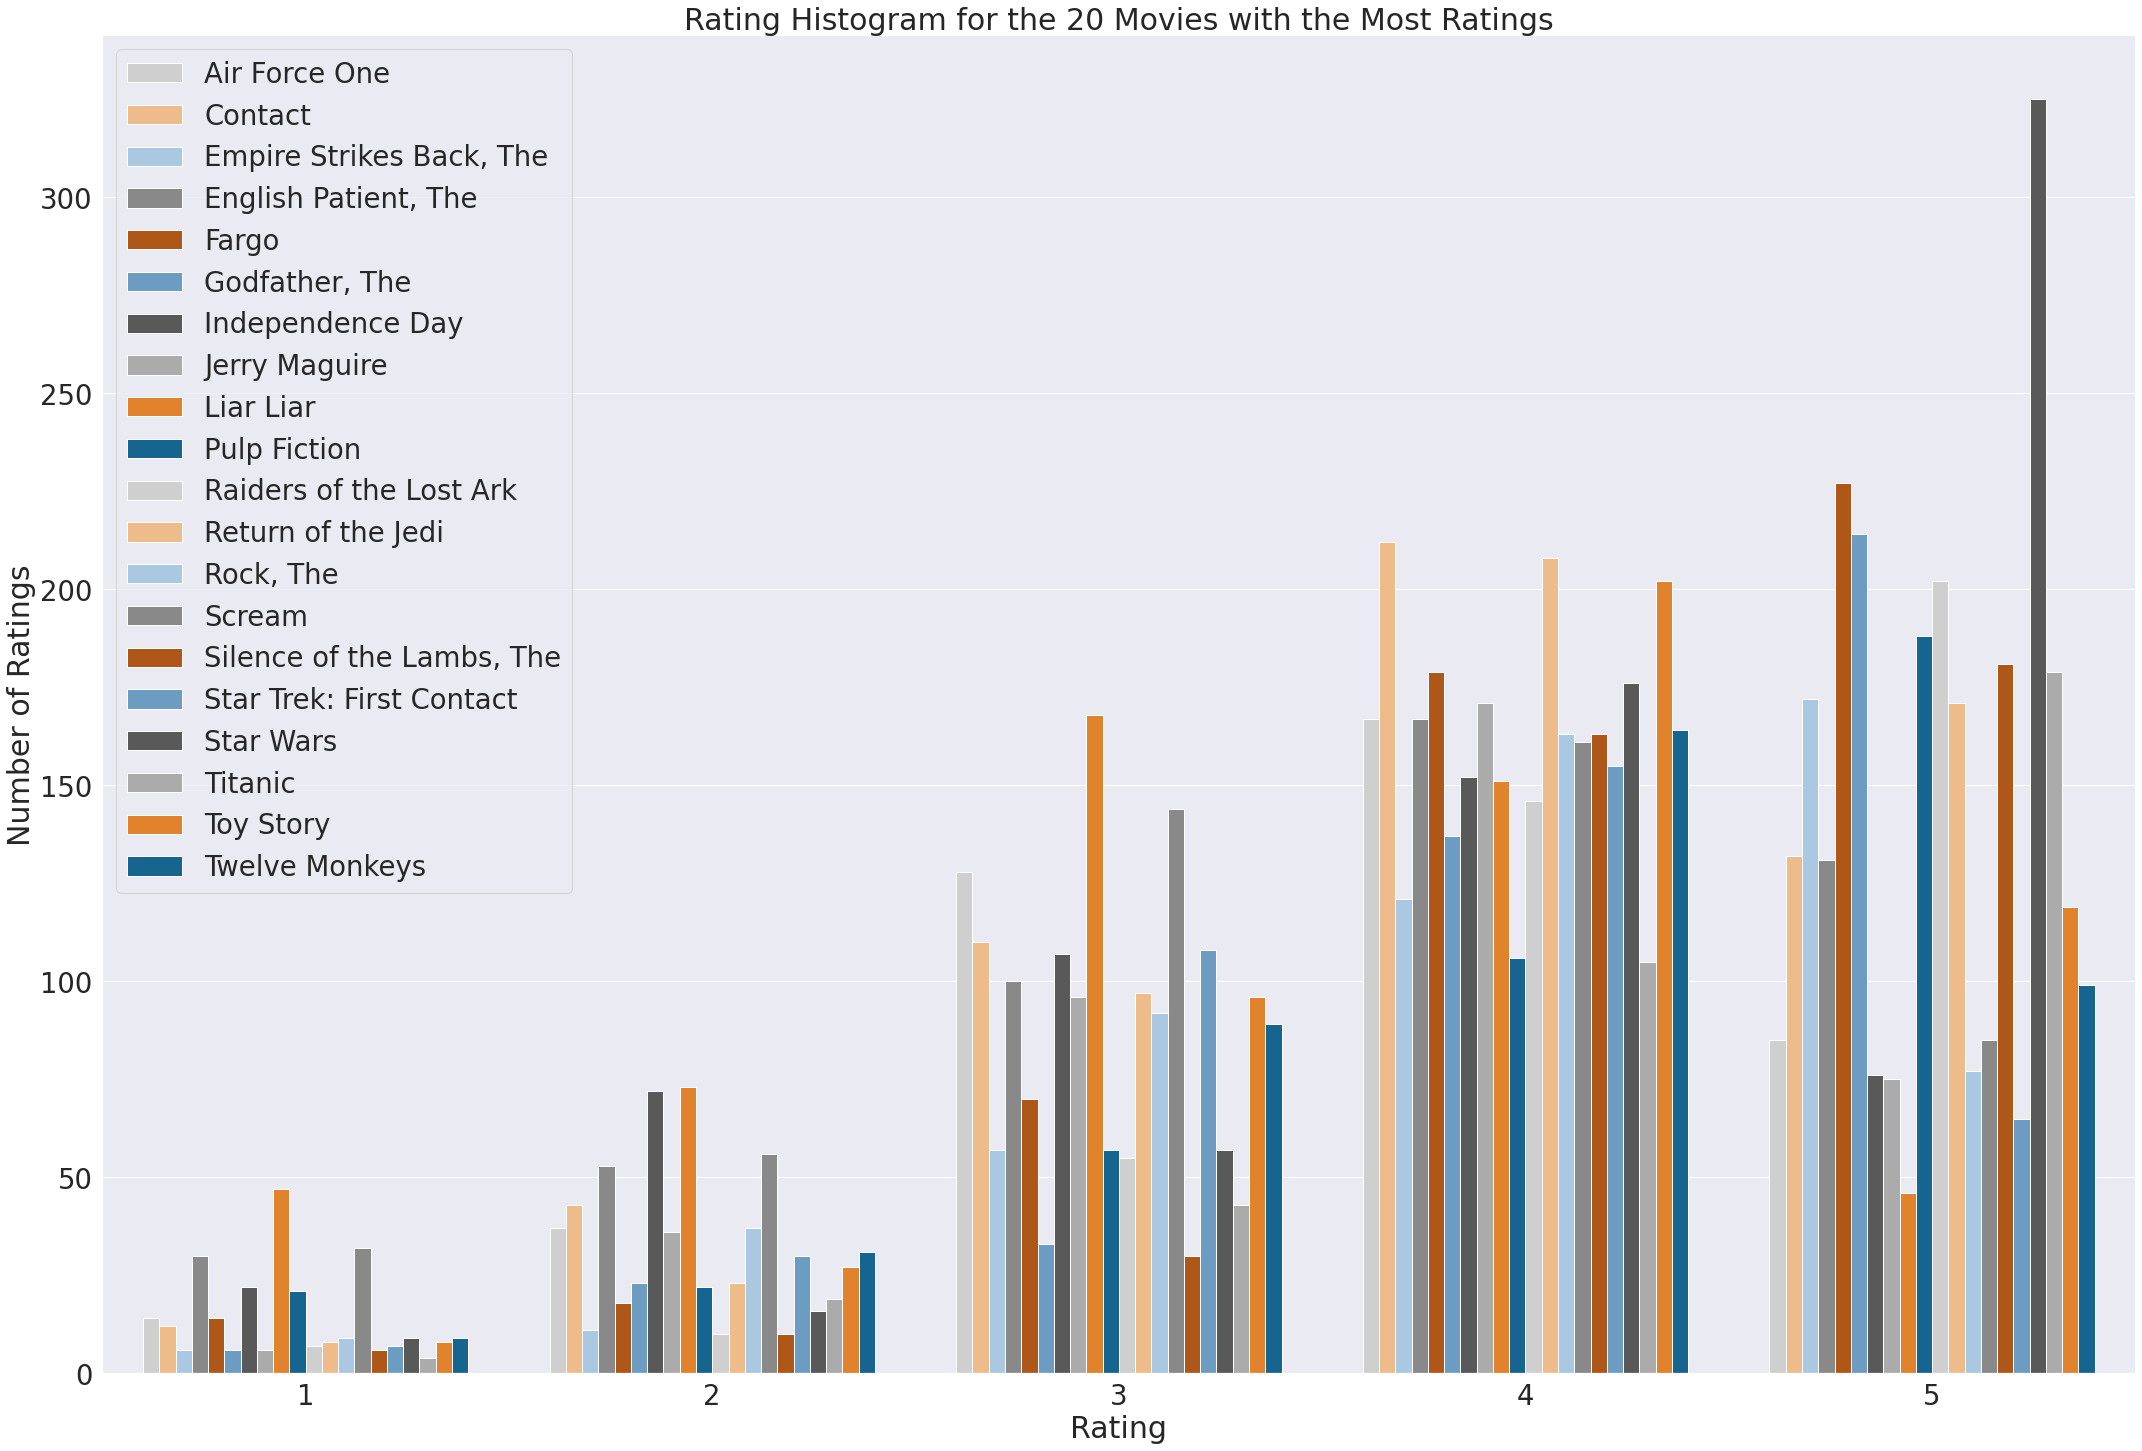

### **Bandit results**

As discussed earlier, bandit algorithms dynamically balance exploration and exploitation. They start out using all possible options, but continuously shift towards choosing the better options more often until one prevails as the best.

The following figure summarizes the first 800 recommendations made during a single replay of a Thompson Sampling bandit on the movie dataset. The figure shows each movie’s percentage of the total recommendations made on the vertical axis, as a function of how many recommendations the algorithm made at that moment on the horizontal axis.

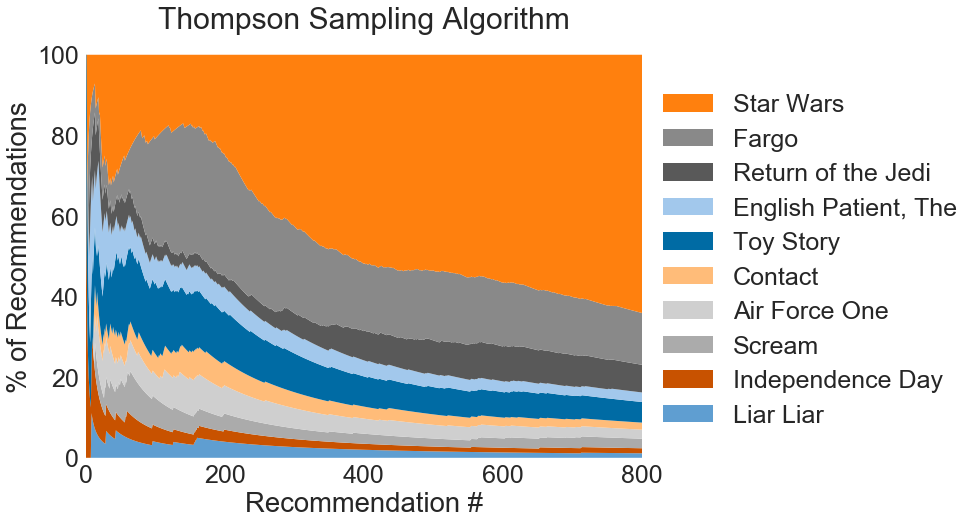

The percentage of time that each movie was recommended during the first 800 recommendations. At first, all movies are being recommended, but over time, the best performing option (Star Wars) is recommended more and more often.

In the beginning, all options are being explored, but over time the best one emerges. Of the first 250 recommendations:

- 91 (~36%) were *Star Wars*
- 63 (~25%) were *Fargo*
- 27 (~11%) were *Toy Story*

After 500 recommendations, *Star Wars* has already accounted for more than 50% of all of the recommendations made by the algorithm; after 1,000 recommendations, its share has surpassed 70%.

### **Bandit and A/B test comparisons**

The cumulative regret experienced over a course of 20,000 recommendations made by three different algorithms (Thompson Sampling, ε-Greedy and an A/B test) is compared in the following figure. The A/B test had a testing phase of 1,000 recommendations. The ε-Greedy algorithm used a value of 0.05 for the parameter ε. All of the experiments were averaged over 20 iterations.

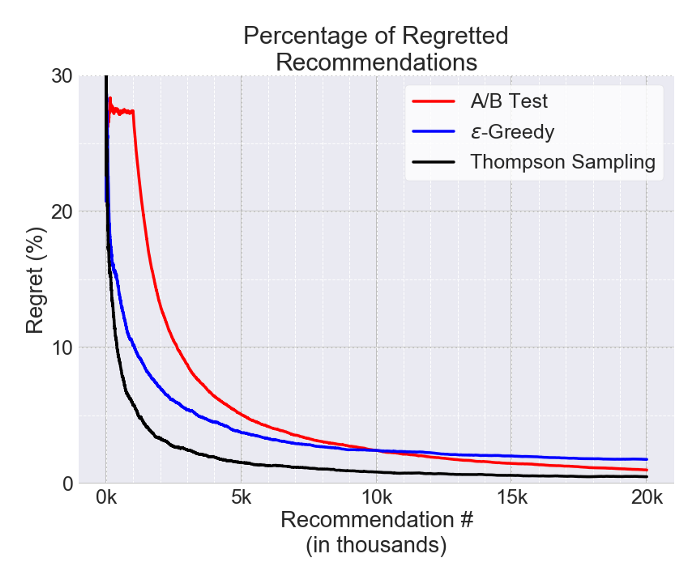

Observed regret as a function of number of recommendations made for three different algorithms: Thompson Sampling (black), ε-Greedy (blue) and an A/B test (red).

The A/B test (red) demonstrates an average performance during the testing period and only after the test has concluded does it show improvement. This makes sense because all ten movies are recommended in equal portions during the testing phase. After the test concludes and *Star Wars* has been identified as the best movie to recommend, it begins to suggest *Star Wars* exclusively and the regret begins to decrease to zero. (It does not immediately drop to zero because we are observing the *cumulative* regret.)

The ε-Greedy results (blue) are significantly better in the short-term than the A/B test, but not as good in the long-term — after ~10,000 recommendations. This is due to the simplistic approach that this particular ε-Greedy algorithm uses to balance exploration and exploitation: the parameter ε specifies the fraction of time that the bandit spends exploring, but that fraction remains constant. As a result, the ε-Greedy bandit will continue to explore at the same rate, even after the best movie has been found, leading to suboptimal performance in the long run. (There are ε-Greedy algorithms that adjust the value of ε over time to account for this, for example, the ε-Decreasing algorithm.)

The Thompson Sampling results (black) are the best of them all. This bandit performs better than the ε-Greedy bandit because it dynamically adjusts the rate at which it explores — rather than using a constant rate. In the beginning, it explores more often, but over time, it explores less often. As a result, this bandit quickly identifies the best movie and exploits it more frequently after it has been found, leading to high performance in both the short- and long term.

### Conclusion

The experiments of movie recommendations clearly demonstrate that the bandit algorithms can reduce regret. The observed regret from the bandit recommendations quickly falls below that of the A/B test, which makes a large quantity of suboptimal recommendations during the testing phase and therefore requires a long recovery time.

Different situations require different bandit algorithms. Depending on the circumstances and the specific needs at hand, it may be better to use a bandit that converges faster — if short-term performance is critical — or one that operates more slowly but results in better long-term performance. While bandit algorithms are a powerful tool, they do have their drawbacks compared to traditional A/B testing. Since bandit algorithms reduce the usage of inferior options, it takes longer to establish a statistically significant measurement of their performance, which can be an important consideration. Ultimately, these trade-offs must be weighed in order to select the right approach for the given situation.

<!---------------------------->

## RecoGym - Theory

Duration: 10

A recommender system is typically built up from components.

1. a) We observe behaviour from the user unrelated to the recommender system. We use this information to produce a user representation, for example we can use feature engineering to turn their history into a fixed length user vector.
2. b) It is often the case that in this part of the model we will build a model of the next item that the user will view - this can help "seed" recommendation models.
3. We observe logs of the recommender system in action. For example we observe the recommender system delivering recommendations and the user either clicking or not clicking on them.

We will use the RecoGym environment to build SVD embeddings of users, we will then use an organic next item prediction as a recommendation. We will not use logs of the recommender system for refining the recommender system, but we will use simulated recommender system logs to evaluate the performance. We will start by focusing on a classical offline evaluation setting, where we try to predict the user's next organic view and measure precision/recall/hit-rate@k on a logged dataset. Then, we will make an offline estimation of the Click-Through Rate (CTR) different models might attain, using the Inverse Propensity Score (IPS) to provide an unbiased estimate. As the usefulness of IPS estimators is highly dependent on the overlap between logging and treatment policies, we will show the impact of this as well. Finally, we simulate an actual A/B-test, measuring CTR for every agent.

### What is RecoGym?

Refer to [this](https://nbviewer.jupyter.org/github/criteo-research/reco-gym/blob/master/Getting%20Started.ipynb) for more details.

RecoGym is a Python OpenAI Gym environment for testing recommendation algorithms. It allows for the testing of both offline and reinforcement-learning based agents. It provides a way to test algorithms in a toy environment quickly. RecoGym follows the usual reinforcement learning setup. This means there are interactions between the environment (the user's behaviour) and the agent (our recommendation algorithm). The agent receives a reward if the user clicks on the recommendation.



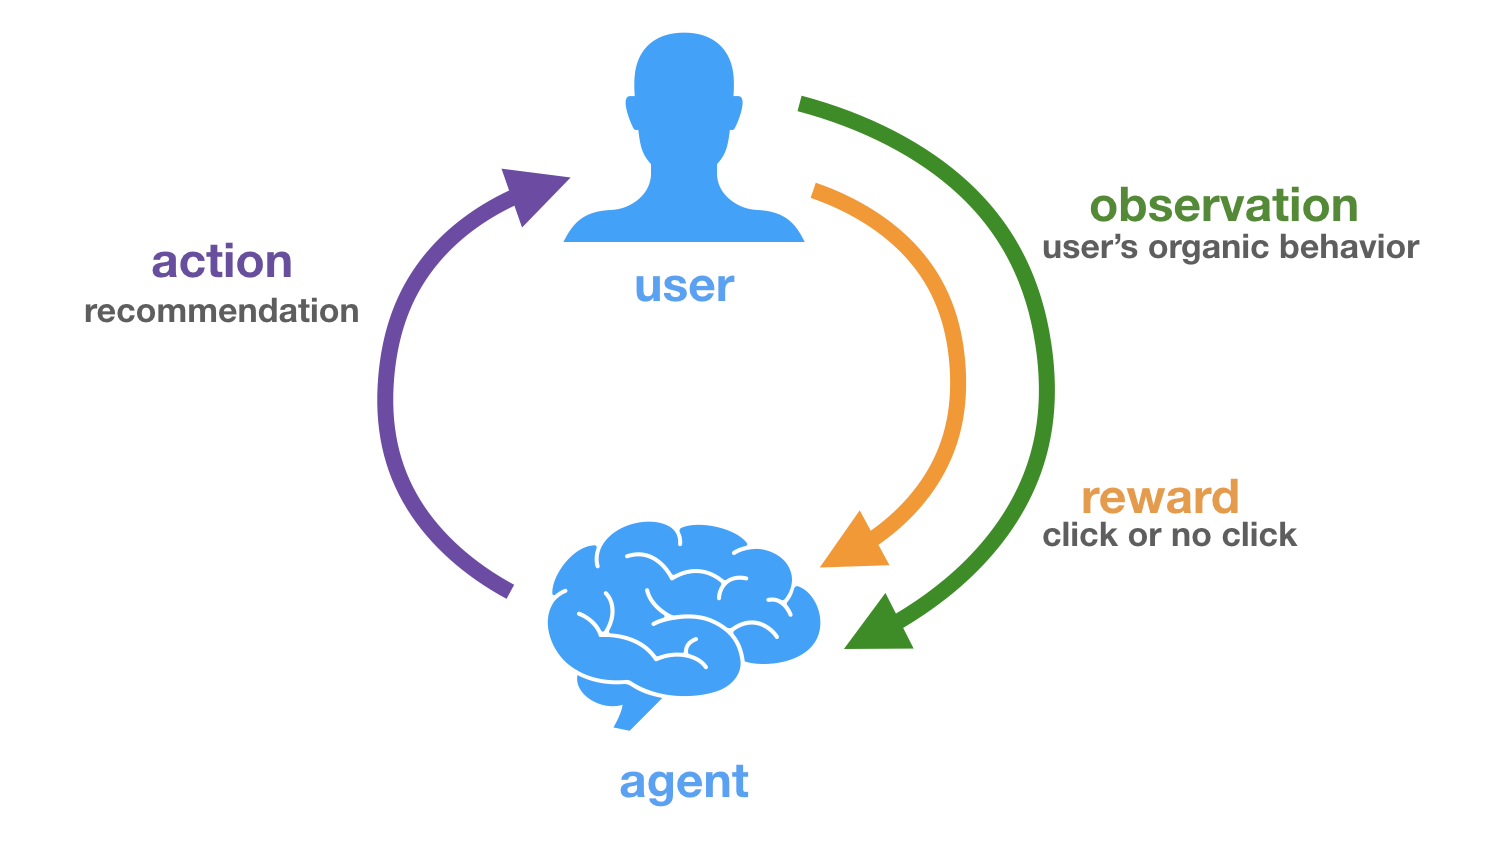

### Organic and Bandit

An Organic session is an observation of items the user interacts with. For example, it could be views of products on an e-commerce website, listens to songs while streaming music, or readings of articles on an online newspaper. A Bandit session is one where we have an opportunity to recommend the user an item and observe their behaviour. We receive a reward if they click.

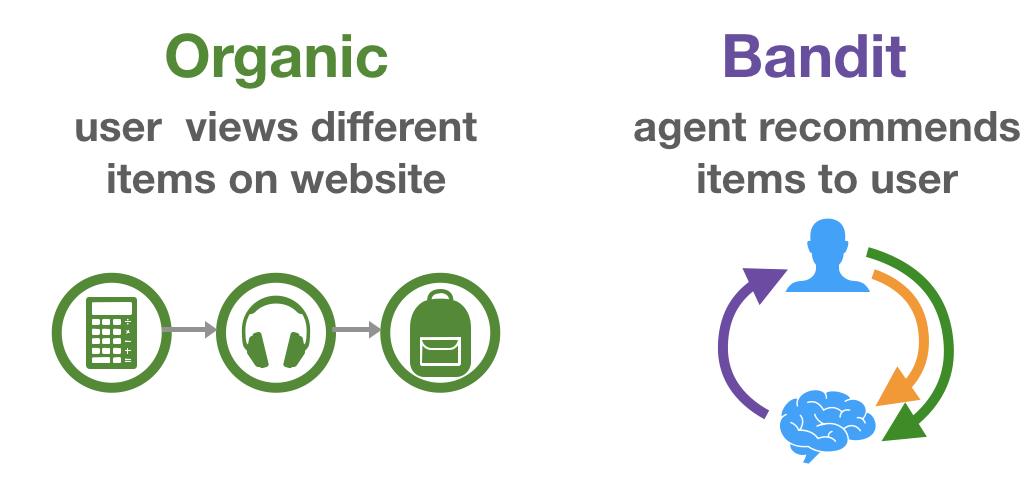

“Pure Organic” behavior is determined by the amount of noise in σ and is unaffected by the number of bandit events (this is not strictly true in the simulation and a small increase is evident on pure organic, as the user also provides an organic signal). If σ is sufficiently small that the actions are correctly ordered it will perform well, in contrast if it is large it will perform poorly. The performance does not change as the number of bandit events increase as these are not used. In contrast the “Pure Bandit” algorithm is unable to make predictions without large numbers of bandit events. It performs poorly when this data is scarce and well when it is plentiful.

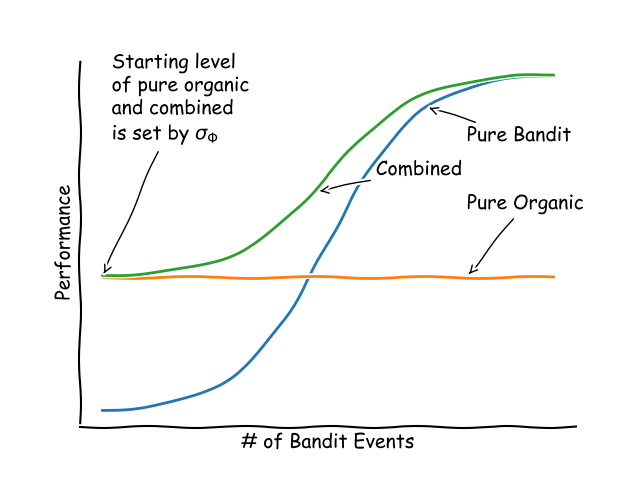

### Interacting with the environment

The code snippet below shows how to initialise the environment and step through in an 'offline' manner (Here offline means that the environment is generating some recommendations for us). We print out the results from the environment at each step.

```python
import gym, recogym

# env_0_args is a dictionary of default parameters (i.e. number of products)
from recogym import env_1_args, Configuration

# You can overwrite environment arguments here:
env_1_args['random_seed'] = 42

# Initialize the gym for the first time by calling .make() and .init_gym()
env = gym.make('reco-gym-v1')
env.init_gym(env_1_args)

# .reset() env before each episode (one episode per user).
env.reset()
done = False

# Counting how many steps.
i = 0

observation, reward, done = None, 0, False
while not done:
    action, observation, reward, done, info = env.step_offline(observation, reward, done)
    print(f"Step: {i} - Action: {action} - Observation: {observation.sessions()} - Reward: {reward}")
    i += 1
```

```python
Output::
Step: 0 - Action: None - Observation: [{'t': 0, 'u': 0, 'z': 'pageview', 'v': 0}] - Reward: None
Step: 1 - Action: {'t': 1, 'u': 0, 'a': 3, 'ps': 0.1, 'ps-a': array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])} - Observation: [] - Reward: 0
Step: 2 - Action: {'t': 2, 'u': 0, 'a': 4, 'ps': 0.1, 'ps-a': array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])} - Observation: [] - Reward: 0
Step: 3 - Action: {'t': 3, 'u': 0, 'a': 5, 'ps': 0.1, 'ps-a': array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])} - Observation: [] - Reward: 0
```

Okay, there's quite a bit going on here:

- `action`, is a number between `0` and `num_products - 1` that references the index of the product recommended.
- `observation` will either be `None` or a session of Organic data, showing the index of products the user views.
- `reward` is 0 if the user does not click on the recommended product and 1 if they do. Notice that when a user clicks on a product (Wherever the reward is 1), they start a new Organic session.
- `done` is a True/False flag indicating if the episode (aka user's timeline) is over.
- `info` currently not used, so it is always an empty dictionary.

Also, notice that the first `action` is `None`. In our implementation, the agent observes Organic behaviour before recommending anything.

<!---------------------------->

## RecoGym - Simulation

Duration: 10

### Generate data

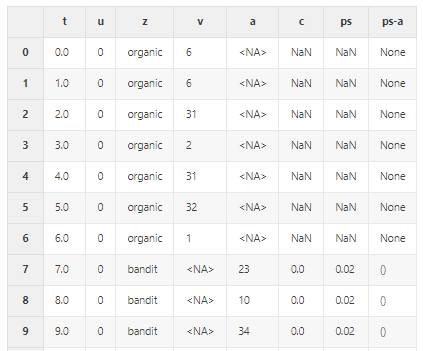

### Define evaluation methods

Leave-one-out traditional agent and IPS-based counterfactual evaluation.

### Agents

Benchmark - SVD, Item-KNN, User-KNN

Baseline - Random, Popularity, User-based popularity

### Offline evaluation

In both methods, leave-one-out and IPS-based, Item-KNN and SVD performed well.



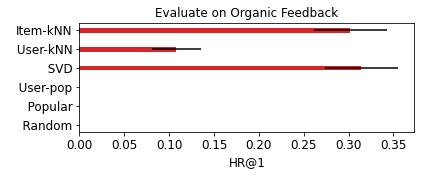

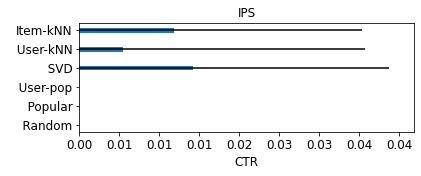

### Online evaluation (simulated)

SVD performed best and gave almost equivalent results to the AB test. Item-KNN also performed well.

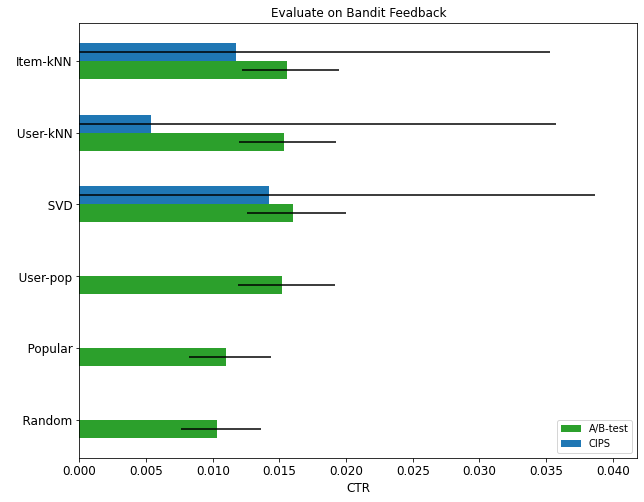

## Conclusion

Duration: 2

Congratulations!

### What we've covered

- Basics of Offline RL Replay method
- Industry examples
- Replay in action on Amazon Electronics and MovieLens dataset
- Simulated and compared different methods using RecoGym RL simulation toolkit.

### Next steps

- Create a RecoGym like simulated environment
- Evaluate on larger datasets

### Links and References

1. [Amazon electronics product reviews experiment](https://github.com/abhi-gm/Multi-Armed-Bandits-for-Recommendations-and-A-B-testing)
2. Movie recommender. MovieLens dataset. Inspired by [this](https://blog.insightdatascience.com/multi-armed-bandits-for-dynamic-movie-recommendations-5eb8f325ed1d) blog.
3. Product recommender. Amazon dataset. Inspired by [this](https://abhishek-maheshwarappa.medium.com/multi-arm-bandits-for-recommendations-and-a-b-testing-on-amazon-ratings-data-set-9f802f2c4073) blog.
4. [MovieLens experiment](https://github.com/antoine-hochart/bandit_algo_evaluation)
5. [MovieLens experiment 2](https://github.com/brian-c-ogorman/ABanditTesting)
6. Reco-Gym Tool experiments. [Git](https://github.com/criteo-research/reco-gym).
7. [RecoGym's Offline experiment notebook](https://nbviewer.jupyter.org/github/criteo-research/reco-gym/blob/master/Offline%20Evaluation%20with%20Bandit%20Feedback.ipynb)
8. [RecoGym's other important notebook](https://nbviewer.jupyter.org/github/criteo-research/reco-gym/blob/master/Bandit%20Feedback%20-%20Evaluate%20Organic%20Model%20with%20Bandit%20Signal.ipynb)
9. [Notion. Bandit Recommenders.](https://www.notion.so/Bandit-Recommenders-fade715fba9c4d2e96dda90875260b82)
10. [Paper. Unbiased Offline Evaluation of Contextual-bandit-based News Article Recommendation Algorithms.](https://arxiv.org/abs/1003.5956)